<a href="https://colab.research.google.com/github/denis3079/Machine-Learning/blob/master/Kohonen_SOM_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Монтирование образа Google drive 

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Установка библиотеки Minisom 

In [0]:
#@title
pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.5-cp36-none-any.whl size=8474 sha256=d0b3b593e38cfe860db54ef2fbc4e1ea7e905645dd05e8475d4e3d9f6d797184
  Stored in directory: /root/.cache/pip/wheels/39/5b/16/cc9402ffc58cafb1da6997e5c94b1bde65e8cb214907879fd4
Successfully built minisom


In [0]:
import matplotlib.cm
print(matplotlib.cm.cmap_d.keys())

dict_keys(['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'Greens_r', 

Построение самоорганизующейся карты Кохонена

Обучение...
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.03703832115246374

...готово!


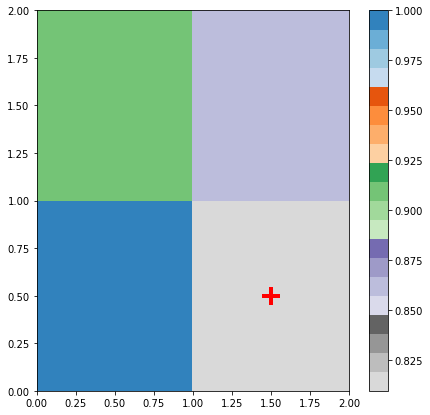

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from matplotlib.gridspec import GridSpec
# чтение набора данных в формате csv
data = np.genfromtxt('/content/drive/My Drive/dataset.csv', delimiter=',', usecols=(1, 2, 3, 4, 5, 6, 7, 8))
# нормализация до единства каждого паттерна в данных
data = np.apply_along_axis(lambda x: x/np.linalg.norm(x), 1, data)
# Инициализация и обучение
som = MiniSom(2, 2, 8, sigma=1., learning_rate=.7, activation_distance='euclidean', topology='rectangular', neighborhood_function='triangle', random_seed=10)
som.pca_weights_init(data)
print("Обучение...")
som.train_batch(data, 1000, verbose=True)  # обучение с 1000-ю итерациями
print("\n...готово!")
# размер самоорганизующейся карты Кохонена в дюймах
plt.figure(figsize=(7, 7))
# Построение карты расстояний для каждого кластера в наборе данных
plt.pcolor(som.distance_map().T, cmap='tab20c_r')
plt.colorbar()
# чтение набора данных в формате csv
target = np.genfromtxt('/content/drive/My Drive/dataset.csv', delimiter=',', usecols=(8), dtype=str)
# функция возвращает новый массив указанной формы и типа, заполненный нулями
t = np.zeros(len(target), dtype=int)
t[target == 'AverageSpeed'] = 1
t[target == 'CountN_Speed'] = 2
t[target == 'CountN_PickAcceleration'] = 3
t[target == 'AveragePickAcceleration'] = 4
t[target == 'CountN_BackAcceleration'] = 5
t[target == 'AverageBackAcceleration'] = 6
t[target == 'CountN_LeftRightAcceleration'] = 7
t[target == 'AverageLeftRightAcceleration'] = 8
# использование разных маркеров и цветов для каждого входящего нейрона
markers = ['+', '0', '3', '4', '5', '6', '7', '8'] 
colors = ["r", "g", "b", "y", "o", "a", "v", "l"]
for cnt, xx in enumerate(data): w = som.winner(xx)  # получение победителя
# разместим маркер на выигрышной позиции для образца хх
plt.plot(w[0]+.5, w[1]+.5, markers[t[cnt]], markerfacecolor='None', markeredgecolor=colors[t[cnt]], markersize=18, markeredgewidth=4)
plt.axis([0, 2, 0, 2])
plt.show()

Распределение частот активации

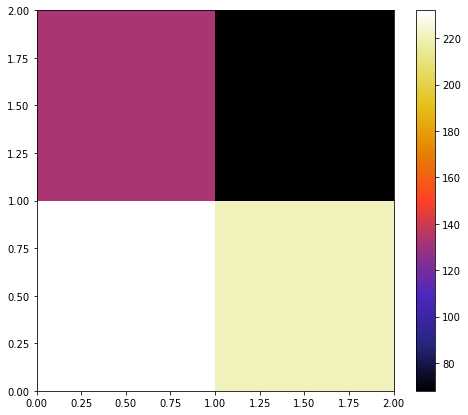

In [167]:
plt.figure(figsize=(8, 7))
frequencies = som.activation_response(data)
plt.pcolor(frequencies.T, cmap='CMRmap') 
plt.colorbar()
plt.show()

In [0]:
import sys

Погрешность квантования (QE - Quantization Error) входных нейронов выражена, как Евклидова норма разности входных нейронов и модели нерона победителя

iteration=49999 status=100.00%

Text(0.5, 0, 'iteration index')

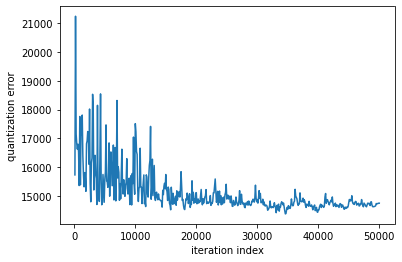

In [168]:
Som = MiniSom(10, 20, 4, sigma=3., learning_rate=.7, neighborhood_function='gaussian', random_seed=10)
som.pca_weights_init(data)
max_iter = 50000
q_error = []
t_error = []
iter_x = []
for i in range(max_iter):
    percent = 100*(i+1)/max_iter
    rand_i = np.random.randint(len(data)) # This corresponds to train_random() method.
    som.update(data[rand_i], som.winner(data[rand_i]), i, max_iter)
    if (i+1) % 100 == 0:
        q_error.append(som.quantization_error(data))
        t_error.append(som.topographic_error(data))
        iter_x.append(i)
        sys.stdout.write(f'\riteration={i:2d} status={percent:0.2f}%')
        
plt.plot(iter_x, q_error)
plt.ylabel('quantization error')
plt.xlabel('iteration index')

Text(0.5, 0, 'iteration index')

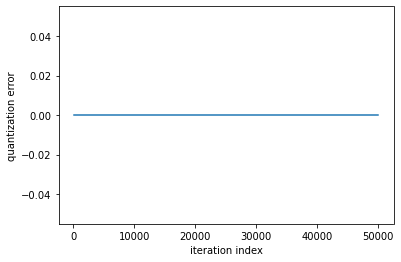

In [169]:
plt.plot(iter_x, t_error)
plt.ylabel('quantization error')
plt.xlabel('iteration index')